In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [23]:
masters=pd.read_csv('Admission_Predict_Ver.csv')

In [15]:
masters.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [16]:
masters.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ChanceofAdmit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [17]:
masters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
ChanceofAdmit        500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


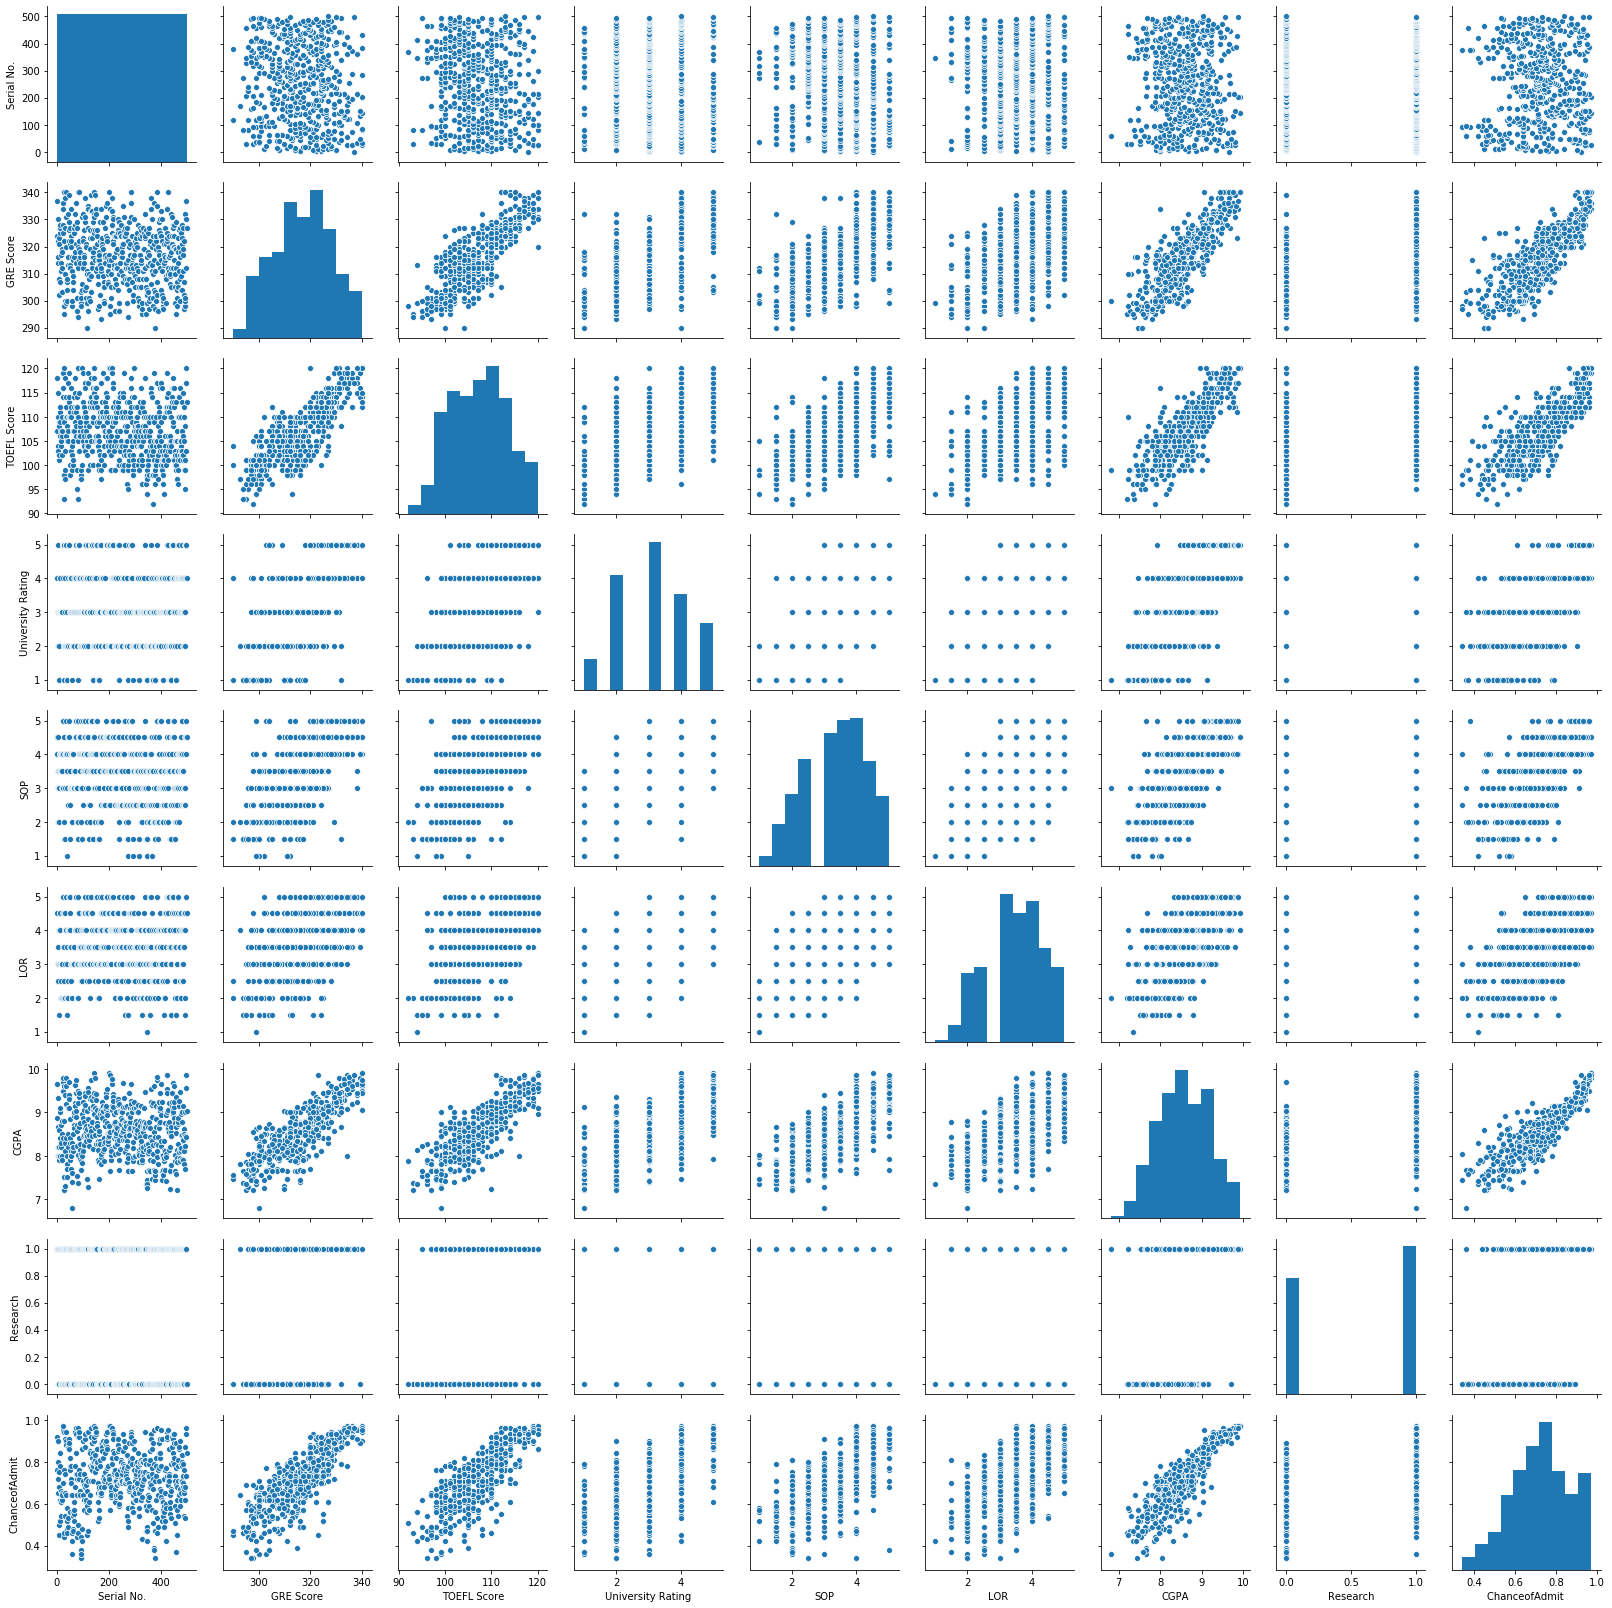

In [18]:
sns.pairplot(masters)

In [24]:
masters.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'ChanceofAdmit'],
      dtype='object')

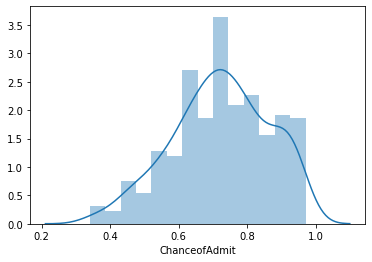

In [25]:
sns.distplot(masters['ChanceofAdmit'])

In [42]:
X=masters[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']]
y=masters['ChanceofAdmit']

In [43]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [63]:
from sklearn.linear_model import LinearRegression

In [50]:
lm = LinearRegression()

In [51]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
# print the intercept
print(lm.intercept_)

-1.2581294328861707


In [53]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
GRE Score,0.001665
TOEFL Score,0.003093
University Rating,0.006736
SOP,0.004879
LOR,0.015472
CGPA,0.118516
Research,0.021545


In [54]:
predictions = lm.predict(X_test)

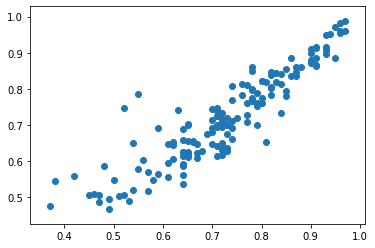

In [55]:
plt.scatter(y_test,predictions)

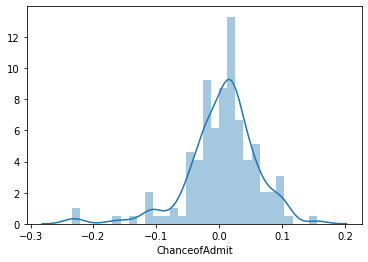

In [64]:
sns.distplot((y_test-predictions),bins=30);

In [57]:
from sklearn import metrics

In [58]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.040859662891438456
MSE: 0.003213103614403529
RMSE: 0.05668424485166517


In [66]:
coeffecients = pd.DataFrame(lm.coef_*100,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
GRE Score,0.166538
TOEFL Score,0.309266
University Rating,0.673617
SOP,0.487887
LOR,1.547233
CGPA,11.851582
Research,2.154477


*Holding all other features fixed, a 1 unit increase in GRE Score is associated with an increase of 0.16% chance of Admission.
Holding all other features fixed, a 1 unit increase in TOEFL Score is associated with an increase of 0.3% chance of Admission.
Holding all other features fixed, a 1 unit increase in University Rating is associated with an increase of 0.67% chance of Admission
Holding all other features fixed, a 1 unit increase in SOP is associated with an increase of 0.48% chance of Admission
Holding all other features fixed, a 1 unit increase in LOR is associated with an increase of 1.54% chance of Admission
Holding all other features fixed, a 1 unit increase in CGPA is associated with an increase of 11.85% chance of Admission
Holding all other features fixed, a 1 unit increase in Research is associated with an increase of 2.15% chance of Admission*